# **Proyecto II**
# Erwin Barriga

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_rows= 200
pd.options.display.max_seq_items = 2000

## CONJUNTO DE DATOS 1

### **Earthquake dataset**

In [3]:
df = pd.read_csv("./Datos 1/earthquake_data.csv")

# Display all columns
pd.set_option('display.max_column', None)

print(df.shape)
df.head(10)

(782, 19)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,green,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,yellow,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,yellow,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico


In [4]:
df["alert"].value_counts(normalize=True)

green     0.783133
yellow    0.134940
orange    0.053012
red       0.028916
Name: alert, dtype: float64

In [5]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.381,the Fiji Islands,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [7]:
df["continent"].value_counts()

Asia             100
South America     55
North America     34
Europe            10
Oceania            4
Africa             3
Name: continent, dtype: int64

### **Imputación de datos usando el API de OpenCage Geocoding**
__[Open Cage](https://opencagedata.com/)__

In [8]:
from opencage.geocoder import OpenCageGeocode
import time

key = "d1e53fb89f1e43ad995eaafe8dfec510"

geocoder = OpenCageGeocode(key)

#### **Imputar location:**

In [9]:
filter_loc = df["location"].isna()
df[filter_loc]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
19,M 6.9 -,6.9,19-05-2022 10:13,2,5,green,1,733,us,127,0.371,45.0,mww,10.000,-54.1325,159.027,NaN,NaN,NaN
68,M 6.9 -,6.9,01-05-2021 01:27,7,6,green,1,919,us,0,2.619,35.0,mww,43.000,38.2296,141.665,NaN,Asia,Japan
246,M 6.9 -,6.9,28-05-2016 05:38,3,3,green,1,733,us,0,5.485,19.0,mww,405.690,-21.9724,-178.204,NaN,NaN,NaN


In [10]:

for index, row in df[filter_loc].iterrows():
  result = geocoder.reverse_geocode(row["latitude"], row["longitude"])
  time.sleep(1.5)
  try: 
    print(index, "\t--> ",  result[0]['formatted'])
    df.loc[index,"location"] = result[0]['formatted']
    if pd.isna(row["continent"]):
      df.loc[index,"continent"] = result[0]['components']['continent'] if result[0]['components']['_type'] != 'body_of_water' else result[0]['components']['body_of_water']
    if pd.isna(row["country"]):
      df.loc[index,"country"] = result[0]['components']['country'] if result[0]['components']['_type'] != 'body_of_water' else result[0]['components']['_category']
  except Exception as e:
    print(index, "\t--> ", e)

2 	-->  Lau, Fiji
4 	-->  South Pacific
19 	-->  South Pacific
68 	-->  Ishinomaki, Miyagi Prefecture, Japan
246 	-->  South Pacific


In [11]:
df[filter_loc]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,"Lau, Fiji",Oceania,Fiji
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,South Pacific,South Pacific,natural/water
19,M 6.9 -,6.9,19-05-2022 10:13,2,5,green,1,733,us,127,0.371,45.0,mww,10.000,-54.1325,159.027,South Pacific,South Pacific,natural/water
68,M 6.9 -,6.9,01-05-2021 01:27,7,6,green,1,919,us,0,2.619,35.0,mww,43.000,38.2296,141.665,"Ishinomaki, Miyagi Prefecture, Japan",Asia,Japan
246,M 6.9 -,6.9,28-05-2016 05:38,3,3,green,1,733,us,0,5.485,19.0,mww,405.690,-21.9724,-178.204,South Pacific,South Pacific,natural/water


#### **Imputar Continent**

In [12]:
filter_cont = df["continent"].isna()

In [13]:
df[filter_cont]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,green,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,"M 6.9 - 59 km WSW of Bengkulu, Indonesia",6.9,16-01-2001 13:25,0,6,NaN,0,732,us,117,0.000,0.0,mwb,28.000,-4.0220,101.7760,"Bengkulu, Indonesia",NaN,Indonesia
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.6600,"Puerto El Triunfo, El Salvador",NaN,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.1700,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.8990,"Mindanao, Philippines",NaN,NaN


In [14]:
for index, row in df[df["continent"].isna()].iterrows():
  result = geocoder.reverse_geocode(row["latitude"], row["longitude"])
  time.sleep(1.5)
  try:
    print(index, "\t--> ",  result[0]['formatted'])
    df.loc[index,"continent"] = result[0]['components']['continent'] if result[0]['components']['_type'] != 'body_of_water' else result[0]['components']['body_of_water']
    if pd.isna(row["country"]):
      df.loc[index,"country"] = result[0]['components']['country'] if result[0]['components']['_type'] != 'body_of_water' else result[0]['components']['_category']
  except Exception as e:
    print(index, "\t--> ", e)

1 	-->  Indian Ocean
3 	-->  South Pacific
5 	-->  South Pacific
6 	-->  South Pacific
7 	-->  Panama
12 	-->  South Pacific
15 	-->  South Pacific
21 	-->  Pacific Ocean
22 	-->  South Pacific
23 	-->  South Pacific
25 	-->  North Pacific
27 	-->  South Pacific
28 	-->  South Pacific
30 	-->  South Pacific
31 	-->  Banten, Indonesia
32 	-->  North Pacific
33 	-->  North Pacific
34 	-->  North Pacific
35 	-->  North Pacific
36 	-->  North Pacific
37 	-->  North Pacific
40 	-->  Jerusu, Maluku Barat Daya, Indonesia
43 	-->  Philippine Sea
45 	-->  South Pacific
46 	-->  South Pacific
47 	-->  list index out of range
49 	-->  South Atlantic Ocean
50 	-->  South Atlantic Ocean
52 	-->  South Atlantic Ocean
54 	-->  North Pacific
55 	-->  North Pacific
56 	-->  South Atlantic Ocean


#### **Imputar Country**

In [ ]:
filter_country = df["country"].isna()

In [ ]:
df[filter_country].head(10)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
38,"M 6.6 - 48 km WNW of Pólis, Cyprus",6.6,11-01-2022 01:07,6,6,green,0,976,us,0,1.168,21.0,mww,21.00,35.1456,31.9095,"Pólis, Cyprus",Asia,NaN
47,"M 6.5 - 80 km SW of Jiquilillo, Nicaragua",6.5,22-09-2021 09:57,7,5,green,1,684,us,0,0.993,114.0,mww,21.00,12.1598,-87.8542,"Jiquilillo, Nicaragua",NaN,NaN
58,"M 7.1 - 60 km ENE of Pondaguitan, Philippines",7.1,11-08-2021 17:46,9,7,green,1,846,us,0,1.273,25.0,mww,55.14,6.4547,126.7420,"Pondaguitan, Philippines",NaN,NaN
76,"M 7.3 - 182 km NE of Gisborne, New Zealand",7.3,04-03-2021 13:27,7,6,green,1,932,us,0,0.918,24.0,mww,10.00,-37.5960,179.5440,"Gisborne, New Zealand",NaN,NaN
86,"M 6.5 - 94 km NW of Vallenar, Chile",6.5,01-09-2020 21:09,6,6,green,0,674,us,0,0.388,49.0,mww,16.00,-27.9285,-71.3937,"Vallenar, Chile",NaN,NaN
115,"M 6.7 - 70 km WSW of Constitución, Chile",6.7,29-09-2019 15:57,7,6,green,1,844,us,0,1.269,98.0,mww,11.00,-35.4758,-73.1630,"Constitución, Chile",NaN,NaN
120,"M 6.8 - 96 km SW of San Antonio, Chile",6.8,01-08-2019 18:28,6,6,green,1,947,us,0,0.817,35.0,mww,25.00,-34.2364,-72.3102,"San Antonio, Chile",NaN,NaN
128,"M 6.6 - 32 km S of La Libertad, El Salvador",6.6,30-05-2019 09:03,7,6,yellow,1,886,us,0,1.193,22.0,mww,57.92,13.1994,-89.3056,"La Libertad, El Salvador",NaN,NaN
150,"M 6.8 - 32 km SW of Lithakiá, Greece",6.8,25-10-2018 22:54,8,7,yellow,0,954,us,0,2.268,15.0,mww,14.00,37.5203,20.5565,"Lithakiá, Greece",Europe,NaN
196,"M 6.5 - 247 km ESE of Attu Station, Alaska",6.5,08-10-2017 22:34,3,5,green,1,651,us,0,1.154,11.0,mww,119.00,52.3909,176.7690,"Attu Station, Alaska",North America,NaN


In [ ]:
for index, row in df[df["country"].isna()].iterrows():
  result = geocoder.reverse_geocode(row["latitude"], row["longitude"])
  time.sleep(1.5)
  try:
    print(index, "\t--> ",  result[0]['formatted'])
    df.loc[index,"country"] = result[0]['components']['country'] if result[0]['components']['_type'] != 'body_of_water' else result[0]['components']['_category']
  except Exception as e:
    print(index, "\t--> ", e)

38 	-->  Levantine Sea
47 	-->  list index out of range
58 	-->  list index out of range
76 	-->  list index out of range
86 	-->  list index out of range
115 	-->  list index out of range
120 	-->  list index out of range
128 	-->  list index out of range
150 	-->  Ionian Sea
196 	-->  Bering Sea
198 	-->  list index out of range
204 	-->  list index out of range
211 	-->  list index out of range
231 	-->  North Pacific
322 	-->  list index out of range
326 	-->  list index out of range
353 	-->  list index out of range
354 	-->  list index out of range
356 	-->  list index out of range
357 	-->  list index out of range
373 	-->  Mediterranean Sea
390 	-->  list index out of range
404 	-->  North Pacific
405 	-->  North Pacific
421 	-->  list index out of range
423 	-->  list index out of range
475 	-->  list index out of range
478 	-->  list index out of range
509 	-->  list index out of range
520 	-->  list index out of range
572 	-->  Mediterranean Sea
573 	-->  Mediterranean Sea
6

Verificar valores faltantes

In [ ]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       0
continent     27
country       30
dtype: int64

Si bien la mayoría de datos faltantes fueron imputados, hubo unas cuantas coordenas que el API no devolvió resultados. Se imputaran estos datos a partir de la columna 'location'

In [ ]:
# para debug
# df.to_csv(path_or_buf='./Datos 1/earthquake_data_imputed.csv',index = False)

#### **Imputar datos de 'Continent' y 'Country' que no pudieron ser actualizados por el API**

In [ ]:
df[(df["continent"].isna()) | (df["country"].isna())]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
47,"M 6.5 - 80 km SW of Jiquilillo, Nicaragua",6.5,22-09-2021 09:57,7,5,green,1,684,us,0,0.9930,114.0,mww,21.000,12.1598,-87.8542,"Jiquilillo, Nicaragua",NaN,NaN
58,"M 7.1 - 60 km ENE of Pondaguitan, Philippines",7.1,11-08-2021 17:46,9,7,green,1,846,us,0,1.2730,25.0,mww,55.140,6.4547,126.7420,"Pondaguitan, Philippines",NaN,NaN
76,"M 7.3 - 182 km NE of Gisborne, New Zealand",7.3,04-03-2021 13:27,7,6,green,1,932,us,0,0.9180,24.0,mww,10.000,-37.5960,179.5440,"Gisborne, New Zealand",NaN,NaN
79,M 6.9 - South Shetland Islands,6.9,23-01-2021 23:36,9,5,green,1,739,us,0,1.5500,16.0,mww,15.000,-61.8484,-55.5590,South Shetland Islands,NaN,Antarctica
86,"M 6.5 - 94 km NW of Vallenar, Chile",6.5,01-09-2020 21:09,6,6,green,0,674,us,0,0.3880,49.0,mww,16.000,-27.9285,-71.3937,"Vallenar, Chile",NaN,NaN
115,"M 6.7 - 70 km WSW of Constitución, Chile",6.7,29-09-2019 15:57,7,6,green,1,844,us,0,1.2690,98.0,mww,11.000,-35.4758,-73.1630,"Constitución, Chile",NaN,NaN
120,"M 6.8 - 96 km SW of San Antonio, Chile",6.8,01-08-2019 18:28,6,6,green,1,947,us,0,0.8170,35.0,mww,25.000,-34.2364,-72.3102,"San Antonio, Chile",NaN,NaN
128,"M 6.6 - 32 km S of La Libertad, El Salvador",6.6,30-05-2019 09:03,7,6,yellow,1,886,us,0,1.1930,22.0,mww,57.920,13.1994,-89.3056,"La Libertad, El Salvador",NaN,NaN
198,"M 8.2 - near the coast of Chiapas, Mexico",8.2,08-09-2017 04:49,9,7,red,1,2910,us,0,0.9440,22.0,mww,47.390,15.0222,-93.8993,"Chiapas, Mexico",NaN,NaN
204,"M 6.8 - 28 km SW of Puerto San José, Guatemala",6.8,22-06-2017 12:31,6,6,yellow,1,1034,us,0,1.0650,38.0,mww,38.120,13.7174,-90.9718,"Puerto San José, Guatemala",NaN,NaN


corregir "Antarctica" como continente:

In [ ]:
df.loc[79,"continent"] = 'Antarctica'

imputar datos usando la información de la columna "location"

In [ ]:
remain_filter = (df["continent"].isna()) | (df["country"].isna())
remain_loc = df[remain_filter]["location"].to_dict()
for index in remain_loc:
  df.loc[index,"country"] = remain_loc[index].split(',')[1].strip()
  filter4country = df["country"] == df.loc[index,"country"]
  continent_filler = df[filter4country]["continent"].dropna().unique()[0]
  for i in df[filter4country]["continent"].index:
    if pd.isna(df.loc[i,"continent"]):
      df.loc[i,"continent"] = continent_filler
  print(df.loc[index,["country", "continent"]], "\n")

country          Nicaragua
continent    North America
Name: 47, dtype: object 

country      Philippines
continent           Asia
Name: 58, dtype: object 

country      New Zealand
continent        Oceania
Name: 76, dtype: object 

country              Chile
continent    South America
Name: 86, dtype: object 

country              Chile
continent    South America
Name: 115, dtype: object 

country              Chile
continent    South America
Name: 120, dtype: object 

country        El Salvador
continent    North America
Name: 128, dtype: object 

country             Mexico
continent    North America
Name: 198, dtype: object 

country          Guatemala
continent    North America
Name: 204, dtype: object 

country              Chile
continent    South America
Name: 211, dtype: object 

country      New Zealand
continent        Oceania
Name: 322, dtype: object 

country        El Salvador
continent    North America
Name: 326, dtype: object 

country              Chile
continent    Sout

Verificar daltos faltantes:

In [ ]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       0
continent      0
country        0
dtype: int64

Solo quedan datos faltantes en nuestra variable objetivo

### **Corregir inconsistencias**

In [ ]:
df["country"].value_counts()

natural/water                                                 266
Indonesia                                                     110
Papua New Guinea                                               56
Chile                                                          44
Vanuatu                                                        27
Japan                                                          24
Solomon Islands                                                22
Mexico                                                         22
Peru                                                           20
Philippines                                                    18
United States of America                                       17
Russia                                                         15
People's Republic of China                                     12
New Zealand                                                    11
Fiji                                                            9
Taiwan    

In [ ]:
df['country'] = df['country'].replace({'United States' : 'United States of America', 'California' : 'United States of America'})

### **Verificar datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   782 non-null    object 
 17  continent  782 non-null    object 
 18  country    782 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df["date_time"].max()

Timestamp('2022-12-11 07:09:00')

<hr>

### **VISUALIZACIÓN CARACTERÍSTICAS DE LOS DATOS**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
sns.set_style("ticks", {'axes.grid' : True, 'figure.facecolor': 'whitesmoke', 'grid.color': '.85'})

In [ ]:
# year_stats = df.groupby(df["date_time"].dt.year)["magnitude"].apply(list)

#### **Distribución de los terremotos por año**

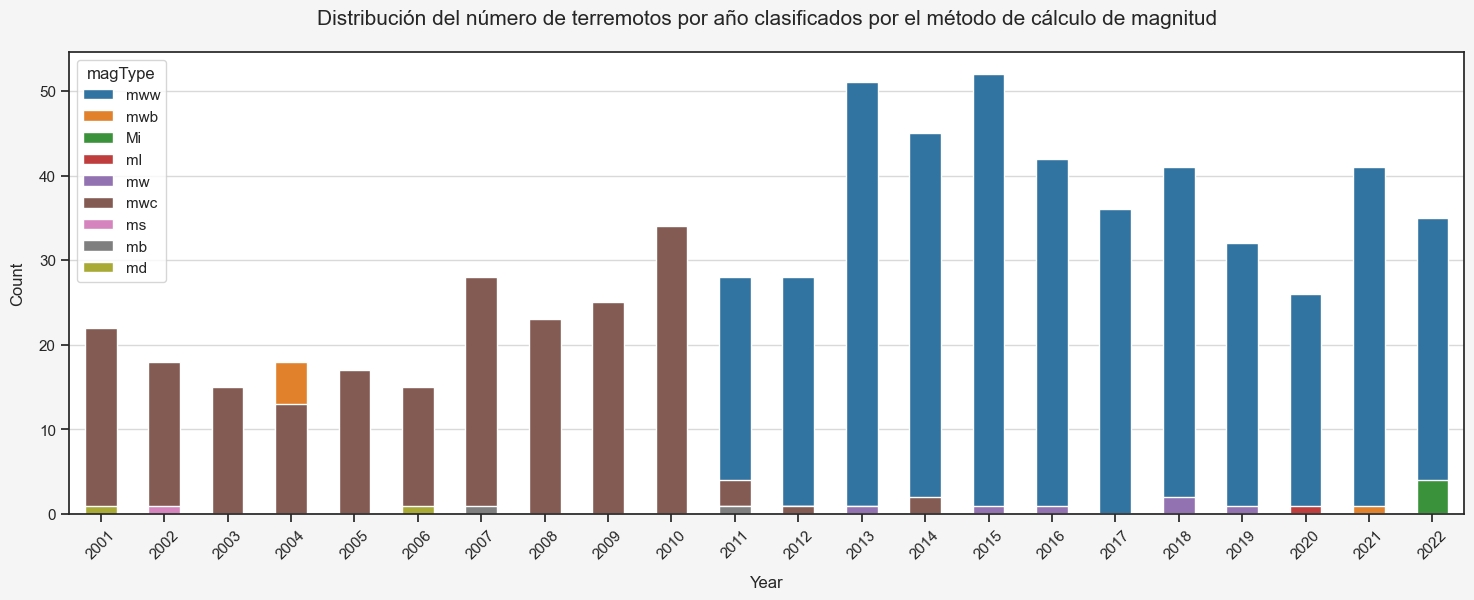

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x=df["date_time"].dt.year, dodge =False, width=.5, palette=sns.color_palette(palette="tab10"), hue="magType")
plt.ylabel('Count', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.xticks(rotation=45)
plt.title("Distribución del número de terremotos por año clasificados por el método de cálculo de magnitud", {"fontsize":15}, pad=20)
plt.show()

A partir del 2011 se descontinua el uso del método para calcular la magnitud del evento telúrico. De mayoritariamente usar "mwc (centroid)" se empieza a utilizar mayoritariamente "mww (Moment W-phase)"

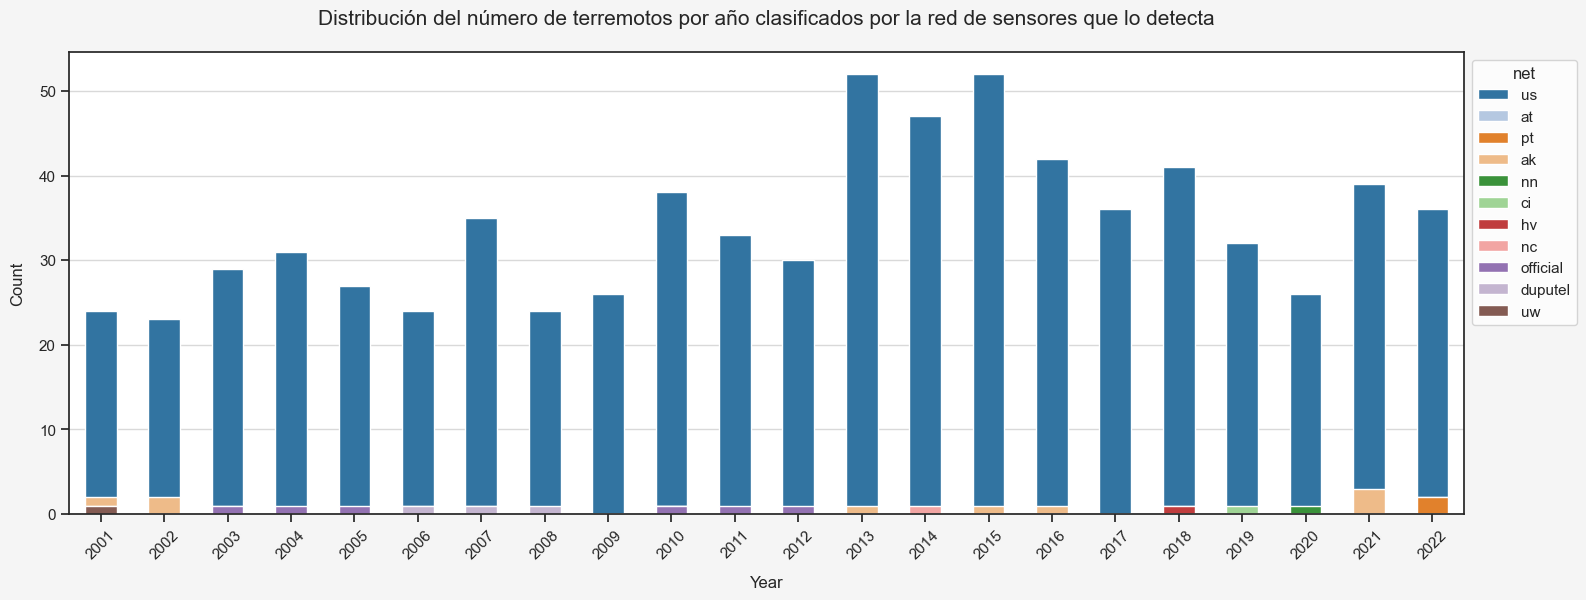

In [ ]:
plt.figure(figsize=(18,6))
ax =sns.countplot(data=df, x=df["date_time"].dt.year, dodge=False, width=.5, palette=sns.color_palette(palette="tab20"), hue="net")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Count', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.xticks(rotation=45)
plt.title("Distribución del número de terremotos por año clasificados por la red de sensores que lo detecta", {"fontsize":15}, pad=20)
plt.show()

Casi todos los eventos han sido detectados por el Servicio Geológico Estadounidense

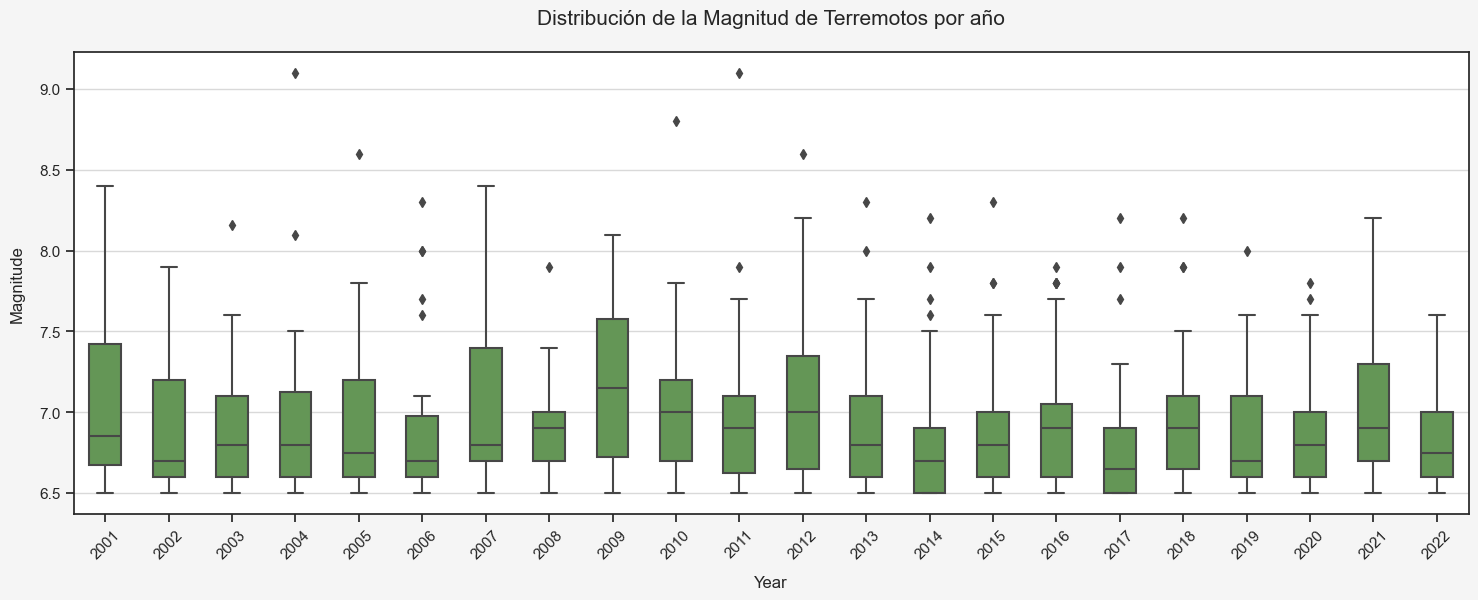

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data=df, x=df["date_time"].dt.year, y="magnitude", dodge =False, width=.5, palette=sns.color_palette(palette="gist_earth", n_colors=1),  )
plt.ylabel('Magnitude', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.xticks(rotation=45)
plt.title("Distribución de la Magnitud de Terremotos por año", {"fontsize":15}, pad=20)
plt.show()

Generalmente la mediana de la magnitud esta por debajo de los 7 grados, sin embargo la mayoría de años tienen terremotos con valores atípicos superiores al máximo quintil.

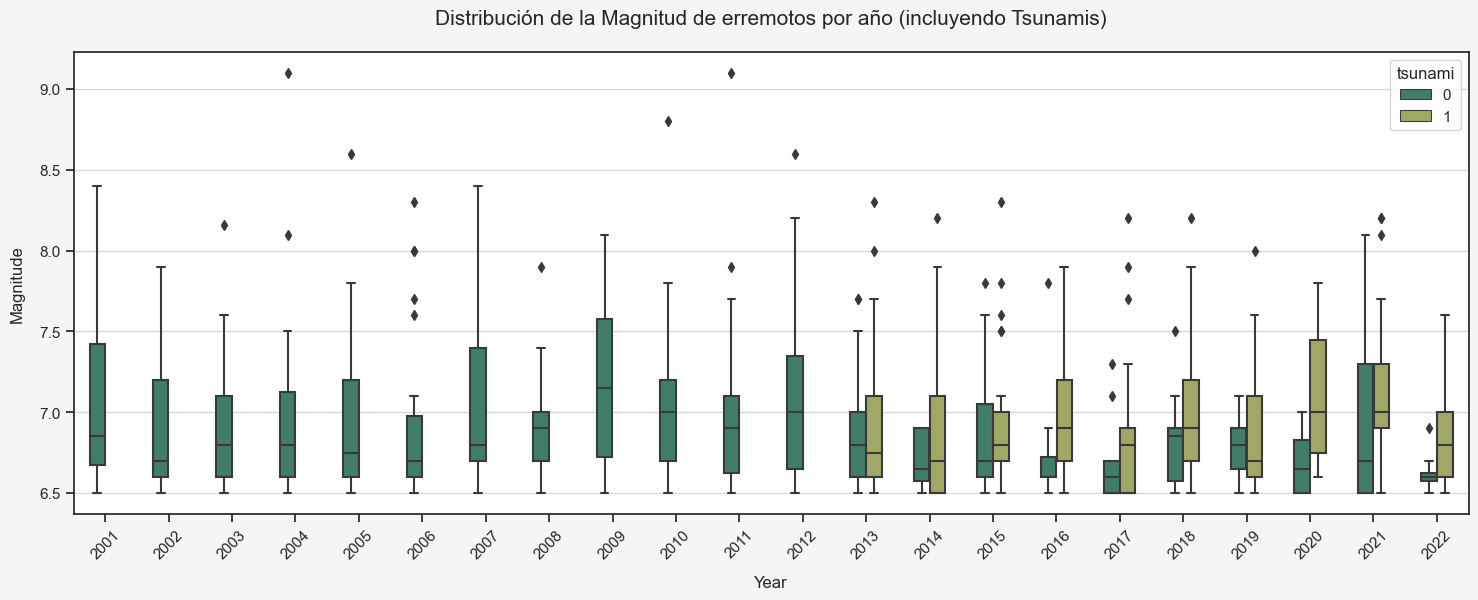

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data=df, x=df["date_time"].dt.year, y="magnitude",  width=.5, palette=sns.color_palette(palette="gist_earth", n_colors=2), hue="tsunami" )
plt.ylabel('Magnitude', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.xticks(rotation=45)
plt.title("Distribución de la Magnitud de erremotos por año (incluyendo Tsunamis)", {"fontsize":15}, pad=20)
plt.show()

Observamos que la medición de tsunami está disponible a partir del 2013, tal vez tenga relación con el cambio del método de medición que se lo hizo a partir del 2011

#### **Terremotos mayores a 8.0 grados**

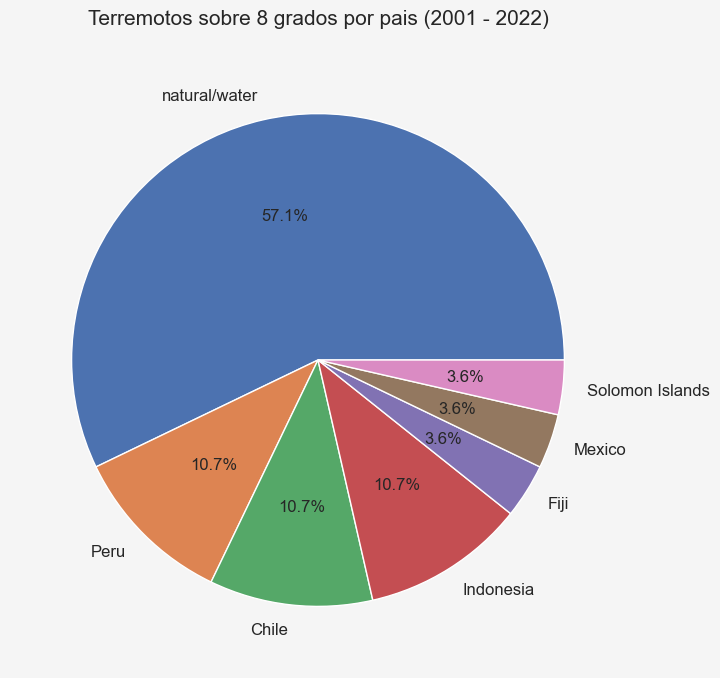

In [ ]:
plt.figure(figsize=(8,8))
countries_above_8 = df[df["magnitude"] >= 8]["country"].value_counts()
plt.pie(countries_above_8, labels=countries_above_8.index, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title("Terremotos sobre 8 grados por pais (2001 - 2022)", {"fontsize":15}, pad=20)
plt.show()

Casi un 60% de los terremotes mayores a 8.0 grados han ocurrido en el océano

#### **Ubicación de los terremotos mayores a 8.0 grados**

In [ ]:
import folium
from branca.element import Figure

In [ ]:
df_map = df[df["magnitude"] >= 8][["alert", "magnitude", "latitude", "longitude"]]
df_map["alert"].replace({"green":"lightgreen", "yellow":"darkgreen", np.nan:"black"}, inplace=True)

fig = Figure(width=1200, height=600)
map = folium.Map(location = [df[df["magnitude"] >= 8]["latitude"].mean(), df[df["magnitude"] >= 8]["longitude"].mean()], zoom_start=2, scrollWheelZoom=False, dragging=True)
for index in df_map.index:
  folium.Marker(location=[df_map.loc[index,"latitude"], df_map.loc[index,"longitude"]],popup=df_map.loc[index,"magnitude"], icon=folium.Icon(color=df_map.loc[index,"alert"], icon="times", prefix='fas fa') ).add_to(map)
fig.add_child(map)

#### **Mapa de correlación**

In [ ]:
df_corr = df[["magnitude", "date_time", "cdi",	"mmi", "tsunami", "sig", "dmin", "gap", "depth", "latitude", "longitude", "alert"]]
df_corr["alert"] = df_corr["alert"].replace({"green":0, "yellow":1, "orange": 2, "red":3})

C:\Users\ErWiN\AppData\Local\Temp\ipykernel_15728\974455460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["alert"] = df_corr["alert"].replace({"green":0, "yellow":1, "orange": 2, "red":3})


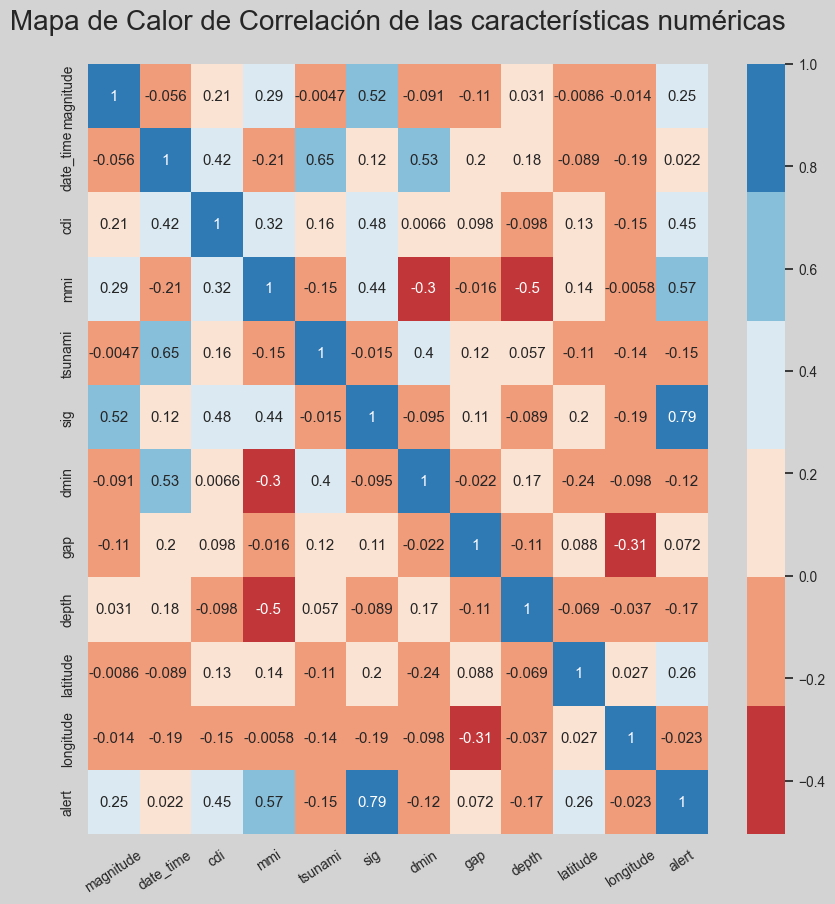

In [ ]:
corr = df_corr.corr(numeric_only=False)
sns.set(rc = {'figure.figsize':(10,10)}, font_scale=0.9)
sns.set_style( {'figure.facecolor': 'lightgrey'})
sns.heatmap(corr, cmap=sns.color_palette("RdBu"), annot = True);
plt.xticks(rotation = 33)
plt.title("Mapa de Calor de Correlación de las características numéricas", {"fontsize":20}, pad=25);

Para la variable objetivo de "Alerta", las características que tienen una correlación fuerte son "sig", "mmi" y "cdi".

<hr>

### **EXPLORACIÓN VARIABLE DE OBJETIVO**

Exploramos la distribución de la variable objetivo en el dataset a fin de poder escoger las columnas que usaremos en la predicción

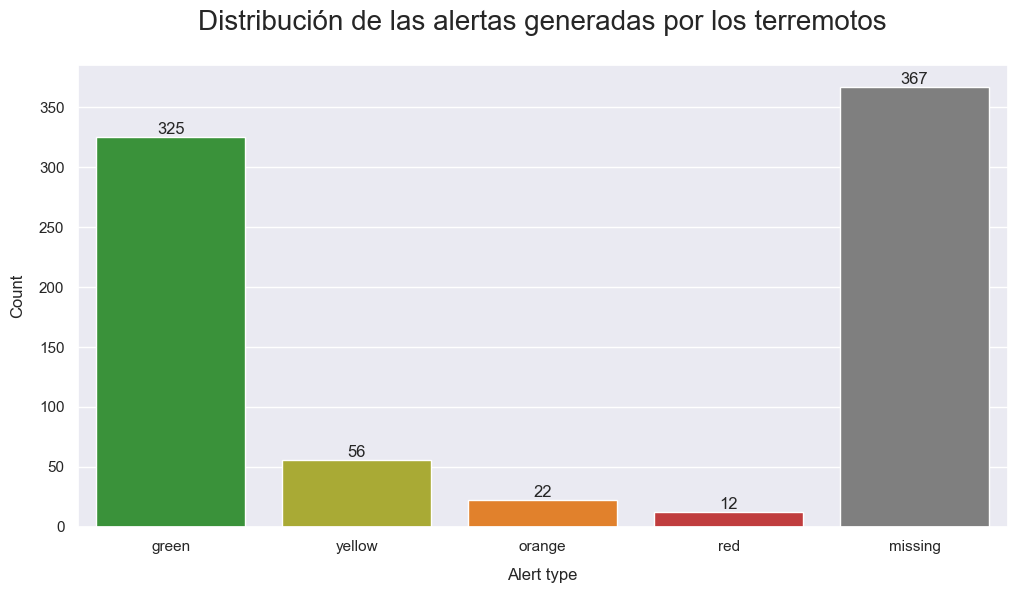

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)}, font_scale=1)
ax = sns.countplot(data=df.fillna(value="missing"), x='alert', order=['green', 'yellow', 'orange', 'red', 'missing'], palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red", "missing":"tab:gray"})
ax.bar_label(ax.containers[0])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Alert type', labelpad=10)
plt.title("Distribución de las alertas generadas por los terremotos", {"fontsize":20}, pad=25);
plt.show()

Primero tomamos nota de lo desbalanceada que esta la variable objetivo. Segundo es la proporción de datos faltantes, alrededor de un 47%.

Exploramos el comportamiento de la variable objetivo a lo largo del dataset:

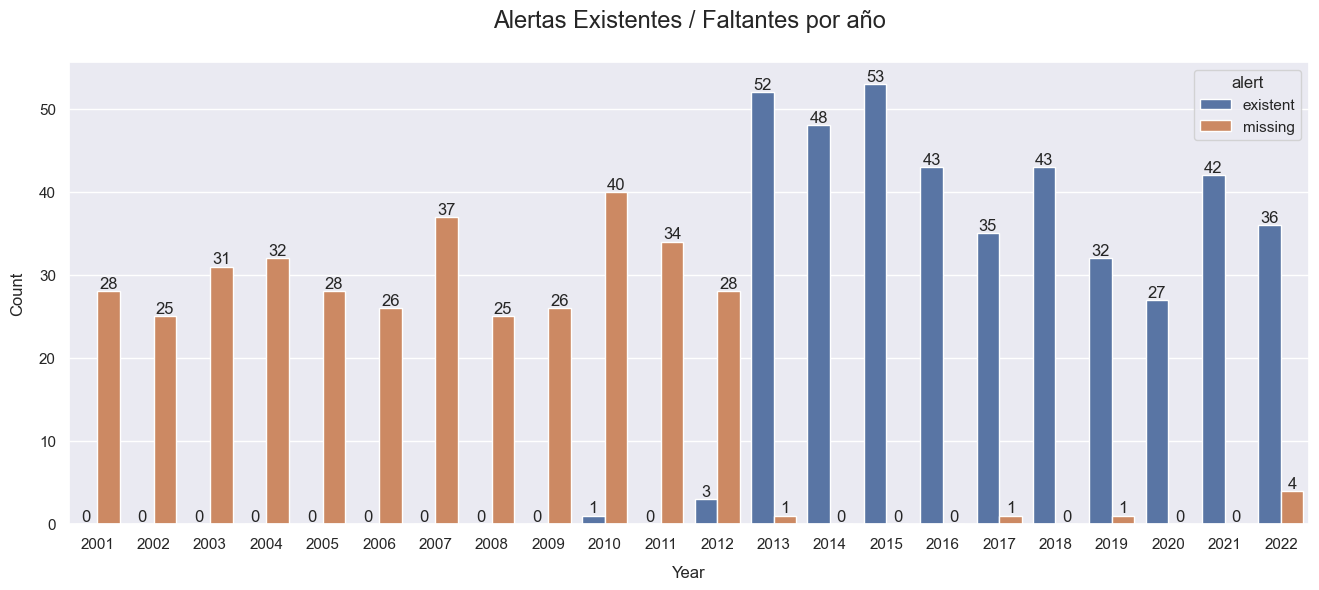

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df[["alert"]].replace({"green":"existent", "yellow":"existent", "orange":"existent", "red":"existent", pd.NA:"missing"}), x=df["date_time"].dt.year, hue="alert")
axes.bar_label(axes.containers[0])
axes.bar_label(axes.containers[1])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.title("Alertas Existentes / Faltantes por año", {"fontsize":17}, pad=25)
plt.show()

Al igual que la columna "tsunami", es a partir del 2013 donde tenemos la clasificación de alerta de una manera consistente.

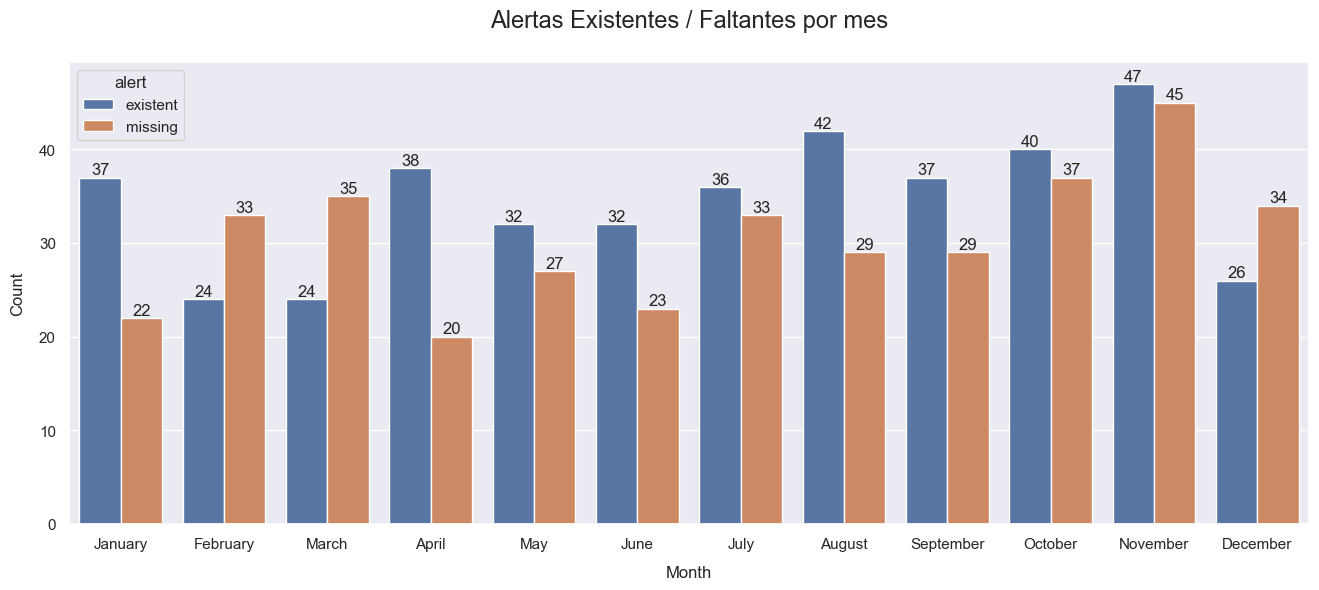

In [ ]:
month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df[["alert"]].replace({"green":"existent", "yellow":"existent", "orange":"existent", "red":"existent", pd.NA:"missing"}), x=df["date_time"].dt.month_name(), order=month_list, hue="alert")
axes.bar_label(axes.containers[0])
axes.bar_label(axes.containers[1])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Month', labelpad=10)
plt.title("Alertas Existentes / Faltantes por mes", {"fontsize":17}, pad=25)
plt.show()


Tomando como referencia el mes donde ocurre el terremotos, vemos que hay una asimetría entre las alertas existentes y faltantes

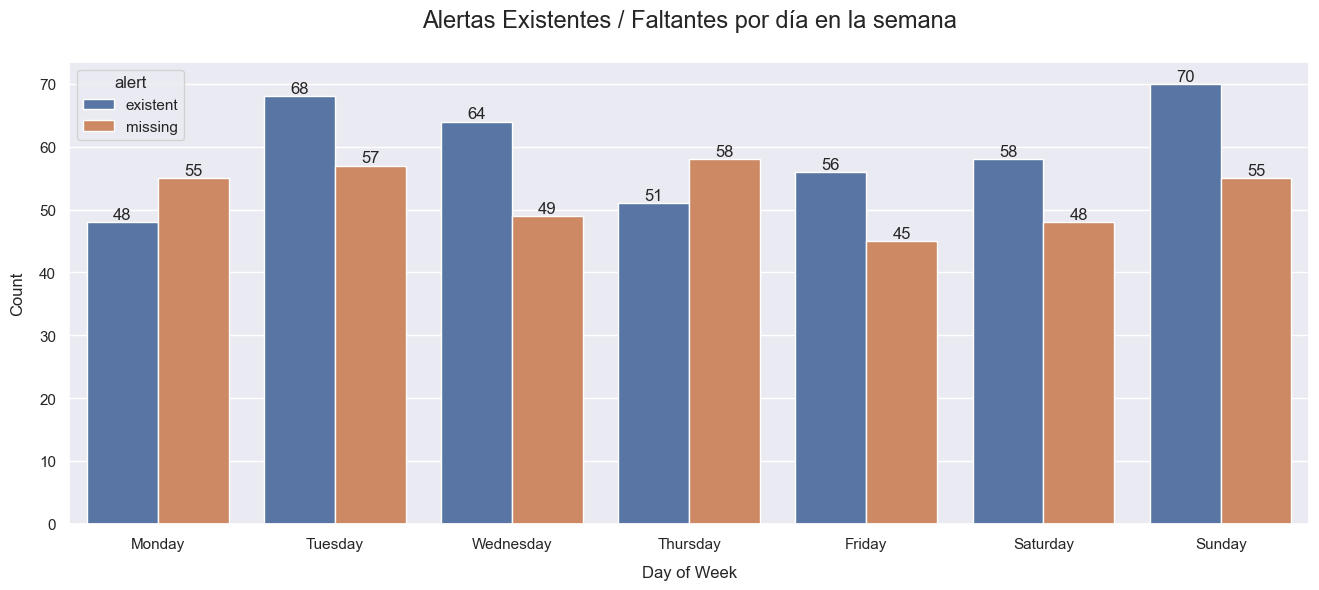

In [ ]:
day_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df[["alert"]].replace({"green":"existent", "yellow":"existent", "orange":"existent", "red":"existent", pd.NA:"missing"}), x=df["date_time"].dt.day_name(), order=day_list, hue="alert")
axes.bar_label(axes.containers[0])
axes.bar_label(axes.containers[1])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Day of Week', labelpad=10)
plt.title("Alertas Existentes / Faltantes por día en la semana", {"fontsize":17}, pad=25)
plt.show()

Vemos menor asimetría aqui.

Crearemos una nueva columna `week_day` y `month` para incluir esta información de fecha que nos ayudará en la predicción. Eliminaremos la columna `date_time`

In [ ]:
df['week_day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month_name()

Simplificamos la columna `continent`. Se agrupará todos los eventos en un mar u oceano como una sola categoría:

In [ ]:
# Simplificar columna "continent"
df["continent"] = df["continent"].apply(lambda x: "Sea/Ocean" if ("Sea" in x) or ("Bay" in x) or (" Ocean" in x) else x)
df["continent"] = df["continent"].apply(lambda x: "North America" if ("Alaska" in x) or ("California" in x) else x)

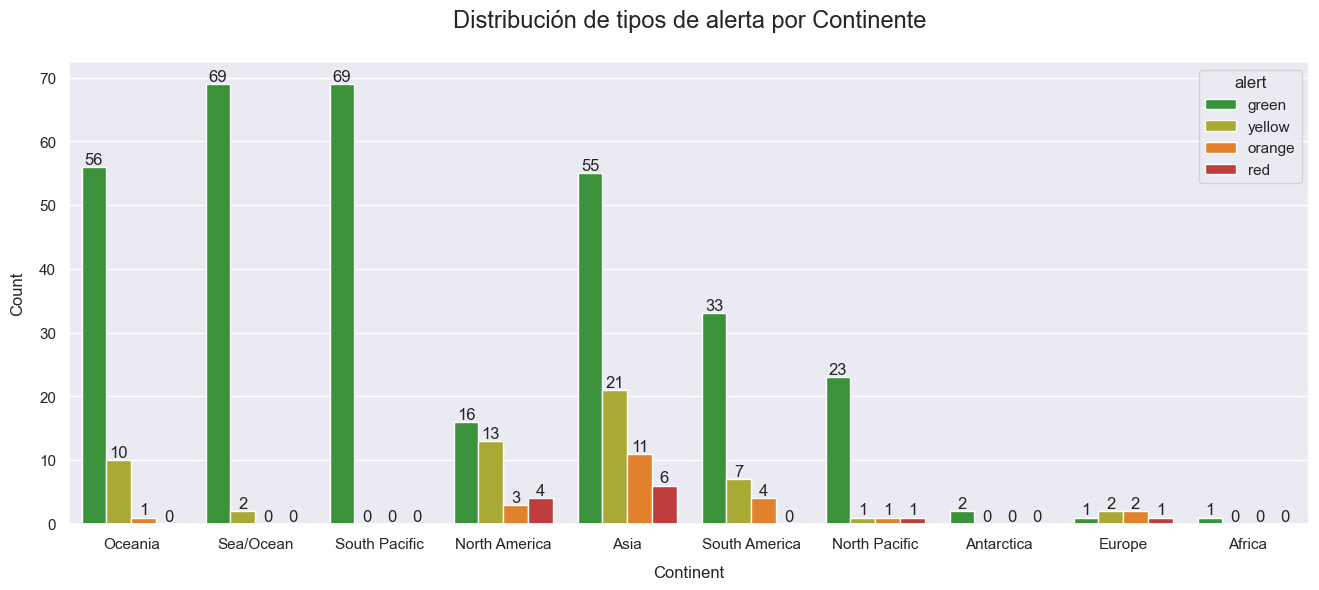

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df, x="continent", hue="alert", palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red"})
for label in axes.containers:
  axes.bar_label(label)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Continent', labelpad=10)
plt.title("Distribución de tipos de alerta por Continente", {"fontsize":17}, pad=25)
plt.show()

Vemos un sesgo del tipo de alerta según el continente donde ocurre el terremoto. Ya que esto es inerente a la data nos conviene replicarlo en la predicción manteniendo esta columna.

In [ ]:
df[df["country"] == "Ecuador"]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,week_day,month
135,"M 7.5 - 111km ESE of Palora, Ecuador",7.5,2019-02-22 10:17:00,7,7,yellow,1,1145,us,0,2.045,15.0,mww,145.00,-2.1862,-77.0505,"Palora, Ecuador",South America,Ecuador,Friday,February
247,"M 6.9 - 24 km NW of Rosa Zarate, Ecuador",6.9,2016-05-18 16:46:00,8,7,green,1,780,us,0,1.192,17.0,mww,29.95,0.4947,-79.6160,"Rosa Zarate, Ecuador",South America,Ecuador,Wednesday,May
248,"M 6.7 - 32 km SE of Muisne, Ecuador",6.7,2016-05-18 07:57:00,5,7,green,1,744,us,0,1.352,21.0,mww,16.00,0.4261,-79.7899,"Muisne, Ecuador",South America,Ecuador,Wednesday,May
250,"M 7.8 - 27 km SSE of Muisne, Ecuador",7.8,2016-04-16 23:58:00,9,9,orange,1,1163,us,0,1.440,15.0,mww,20.59,0.3819,-79.9218,"Muisne, Ecuador",South America,Ecuador,Saturday,April
490,M 7.1 - Ecuador,7.1,2010-12-08 11:54:00,6,5,NaN,0,945,us,672,0.000,12.4,mwc,206.70,-1.2660,-77.3060,Ecuador,South America,Ecuador,Wednesday,December
582,"M 6.8 - 30 km E of Macas, Ecuador",6.8,2007-11-16 03:13:00,7,6,NaN,0,790,us,649,0.000,27.0,mwc,122.90,-2.3120,-77.8380,"Macas, Ecuador",South America,Ecuador,Friday,November


<hr>

### **PREDICCIÓN VARIABLE DE OBJETIVO**

Preparación de los datos que se van a utilizar

In [ ]:
dfp = df[df["alert"].notna()]

In [ ]:
dfp.drop(columns=["title", "date_time", "tsunami", "net", "magType", "location", "country"], inplace=True)

# Preparación variable objetivo categórica
dfp["alert"] = dfp["alert"].replace({"green":0, "yellow":1, "orange": 2, "red":3})
dfp

C:\Users\ErWiN\AppData\Local\Temp\ipykernel_15728\553497534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp.drop(columns=["title", "date_time", "tsunami", "net", "magType", "location", "country"], inplace=True)
C:\Users\ErWiN\AppData\Local\Temp\ipykernel_15728\553497534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["alert"] = dfp["alert"].replace({"green":0, "yellow":1, "orange": 2, "red":3})


,magnitude,cdi,mmi,alert,sig,nst,dmin,gap,depth,latitude,longitude,continent,week_day,month
0,7.0,8,7,0,768,117,0.5090,17.0,14.000,-9.7963,159.596,Oceania,Tuesday,November
1,6.9,4,4,0,735,99,2.2290,34.0,25.000,-4.9559,100.738,Sea/Ocean,Friday,November
2,7.0,3,3,0,755,147,3.1250,18.0,579.000,-20.0508,-178.346,Oceania,Sunday,December
3,7.3,5,5,0,833,149,1.8650,21.0,37.000,-19.2918,-172.129,South Pacific,Friday,November
4,6.6,0,2,0,670,131,4.9980,27.0,624.464,-25.5948,178.278,South Pacific,Sunday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,6.8,6,7,0,771,596,0.0000,19.3,45.000,-28.0940,-70.653,South America,Wednesday,January
423,7.4,8,7,1,1455,751,0.0000,25.5,24.000,13.9880,-91.895,North America,Wednesday,July
440,8.2,9,6,0,1213,341,0.0000,14.9,25.100,0.8020,92.463,Sea/Ocean,Sunday,November
441,8.6,9,7,1,2048,499,0.0000,16.6,20.000,2.3270,93.063,Sea/Ocean,Sunday,November


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Matriz características X y vector objetivo y
X = dfp.drop(columns = ['alert'])
y = dfp['alert']

# Train Test Split con 'stratify=y' ya que mi variable objetivo es una clasificación desbalanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Preprocesamiento

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

categorical_pipe = make_pipeline(ohe)
category_tuple = (categorical_pipe, cat_selector)

numeric_pipe = make_pipeline(scaler)
number_tuple = (numeric_pipe, num_selector)

preprocessor = make_column_transformer(category_tuple, remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

column_names = preprocessor.get_feature_names_out(X_train.columns)
pd.DataFrame(X_train_processed, columns=column_names)

,pipeline__continent_Antarctica,pipeline__continent_Asia,pipeline__continent_Europe,pipeline__continent_North America,pipeline__continent_North Pacific,pipeline__continent_Oceania,pipeline__continent_Sea/Ocean,pipeline__continent_South America,pipeline__continent_South Pacific,pipeline__week_day_Friday,pipeline__week_day_Monday,pipeline__week_day_Saturday,pipeline__week_day_Sunday,pipeline__week_day_Thursday,pipeline__week_day_Tuesday,pipeline__week_day_Wednesday,pipeline__month_April,pipeline__month_August,pipeline__month_December,pipeline__month_February,pipeline__month_January,pipeline__month_July,pipeline__month_June,pipeline__month_March,pipeline__month_May,pipeline__month_November,pipeline__month_October,pipeline__month_September,remainder__magnitude,remainder__cdi,remainder__mmi,remainder__sig,remainder__nst,remainder__dmin,remainder__gap,remainder__depth,remainder__latitude,remainder__longitude
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.1,6.0,6.0,799.0,0.0,1.27100,11.0,33.00,1.6213,126.4160
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.1,9.0,9.0,1646.0,77.0,0.04616,43.0,8.00,35.7695,-117.5990
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.3,5.0,5.0,833.0,149.0,1.86500,21.0,37.00,-19.2918,-172.1290
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,8.0,7.0,768.0,117.0,0.50900,17.0,14.00,-9.7963,159.5960
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.6,8.0,7.0,693.0,0.0,1.69700,20.0,17.00,39.2732,73.9776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,7.0,6.0,709.0,0.0,2.48500,43.0,20.00,7.9401,-82.6865
307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,6.0,760.0,0.0,1.36200,12.0,552.06,-7.2968,122.5350
308,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,7.0,820.0,0.0,1.67100,18.0,73.00,-7.8470,147.7550
309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,5.0,6.0,971.0,0.0,3.29400,14.0,196.00,18.5429,145.5070


##### **EVALUACIÓN DE MODELOS:**

Usamos `f1_weighted` como métrica de evaluación ya que toma en cuenta la precisión y el recall. Esto es útil para objetivos de clasificación desbalanceados

#### 1) Decision Tree Classifier:

In [ ]:
# Optimización Hyper-parámetros Decision Tree Classifier:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_processed, y_train)

param_grid = {
  'max_depth': [8, 10, 12],
  'min_samples_split': [2, 4, 6, 8, 10],
  'min_samples_leaf': [1, 2, 3, 4, 5],
  'max_features': ['sqrt', 'log2', None]
}

gs_dtc = GridSearchCV(dtc, param_grid, cv=5, scoring="f1_weighted")
gs_dtc.fit(X_train_processed, y_train)

dtc = DecisionTreeClassifier(random_state=42, **gs_dtc.best_params_)
dtc.fit(X_train_processed, y_train)
y_pred_dtc = dtc.predict(X_test_processed)

print("Best parameters DecisionTreeClassifier: ", gs_dtc.best_params_)
print("Best score DecisionTreeClassifier: \t{:.3f}".format(gs_dtc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_dtc, average='weighted'), 3))

Best parameters DecisionTreeClassifier:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score DecisionTreeClassifier: 	0.808
F1 score on test data:			 0.801


#### 2) Random Forest Classifier:

In [ ]:
# Optimización Hyper-parámetros Random Forest Classifier:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_processed, y_train)

param_grid = {
  'n_estimators': [280, 300, 320],
  'max_depth': [13, 15, 17],
  'min_samples_split': [2, 5 ],
  'min_samples_leaf': [1, 2 ]
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=5, scoring='f1_weighted')
gs_rfc.fit(X_train_processed, y_train)

rfc = RandomForestClassifier(random_state=42, **gs_rfc.best_params_)
rfc.fit(X_train_processed, y_train)
y_pred_rfc = rfc.predict(X_test_processed)


print("Best parameters RandomForestClassifier: ", gs_rfc.best_params_)
print("Best score RandomForestClassifier: \t{:.3f}".format(gs_rfc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_rfc, average='weighted'), 3))

Best parameters RandomForestClassifier:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score RandomForestClassifier: 	0.810
F1 score on test data:			 0.827


#### 3) Gradient Boosting Classifier:

In [ ]:
# Optimización Hyper-parámetros gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [75, 80, 85],
    'max_depth': [2, 3, 4]
}

gs_gbc = GridSearchCV(gbc, param_grid, cv=5, scoring='f1_weighted')
gs_gbc.fit(X_train_processed, y_train)

gbc = GradientBoostingClassifier(random_state=42, **gs_gbc.best_params_)
gbc.fit(X_train_processed, y_train)
y_pred_gbc = gbc.predict(X_test_processed)

print("Best parameters GradientBoostingClassifier: ", gs_gbc.best_params_)
print("Best score GradientBoostingClassifier: \t{:.3f}".format(gs_gbc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_gbc, average='weighted'), 3))

Best parameters GradientBoostingClassifier:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}
Best score GradientBoostingClassifier: 	0.850
F1 score on test data:			 0.85


#### 4) XGB Boosting Classifier:

In [ ]:
# Optimización Hyper-parámetros XGB boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

param_grid = {
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [8, 9, 10],
  'n_estimators': [55, 60, 65],
  'gamma': [0.1]
}

gs_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_weighted')
gs_xgb.fit(X_train_processed, y_train)

xgb = XGBClassifier(**gs_xgb.best_params_)
xgb.fit(X_train_processed, y_train)
y_pred_xgb = xgb.predict(X_test_processed)

print("Best parameters XGBClassifier: ", gs_xgb.best_params_)
print("Best score XGBClassifier: \t{:.3f}".format(gs_xgb.best_score_))
print("F1 score on test data:\t\t", round(f1_score(y_test, y_pred_xgb, average='weighted'), 3))

Best parameters XGBClassifier:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 60}
Best score XGBClassifier: 	0.861
F1 score on test data:		 0.851


#### 5) LGBM Classifier:

In [ ]:
# Optimización Hyper-parámetros LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_processed, y_train)

param_grid = {
  'num_leaves': [25, 30, 35],
  'learning_rate': [0.1, 0.01],
  'n_estimators': [80, 100, 120],
  'min_child_samples': [10, 20],
  'subsample': [0.8, 1],
  'colsample_bytree': [0.8, 1]
}

gs_lgbm = GridSearchCV(lgbm, param_grid, cv=5, scoring='f1_weighted')
gs_lgbm.fit(X_train_processed, y_train)

lgbm = LGBMClassifier(**gs_lgbm.best_params_)
lgbm.fit(X_train_processed, y_train)
y_pred_lgbm = lgbm.predict(X_test_processed)

print("Best parameters LGBMClassifier: ", gs_lgbm.best_params_)
print("Best score LGBMClassifier: \t{:.3f}".format(gs_lgbm.best_score_))
print("F1 score on test data:\t\t", round(f1_score(y_test, y_pred_lgbm, average='weighted'), 3))

Best parameters LGBMClassifier:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 30, 'subsample': 0.8}
Best score LGBMClassifier: 	0.842
F1 score on test data:		 0.868


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

**Matriz Confusión**

0    81
1    14
2     6
3     3
Name: alert, dtype: int64


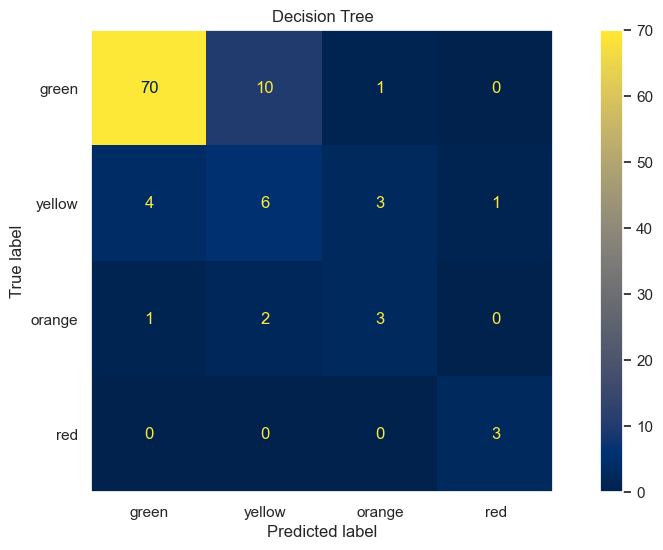

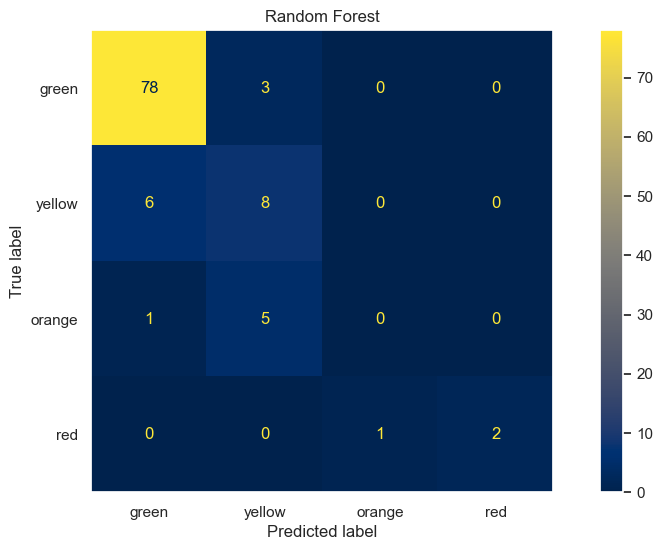

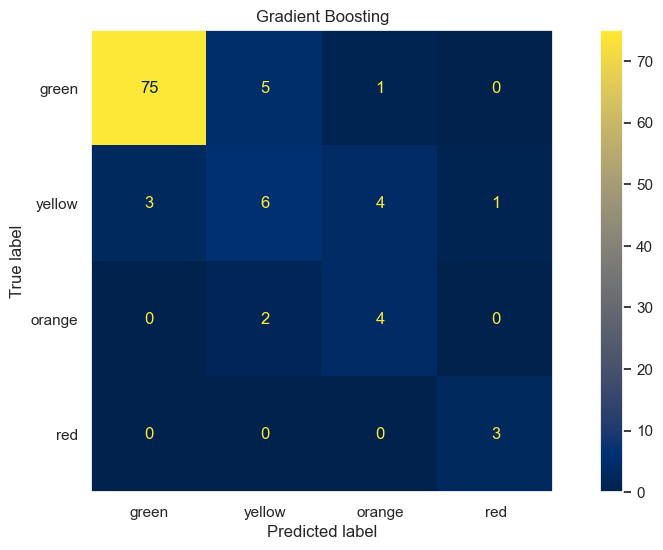

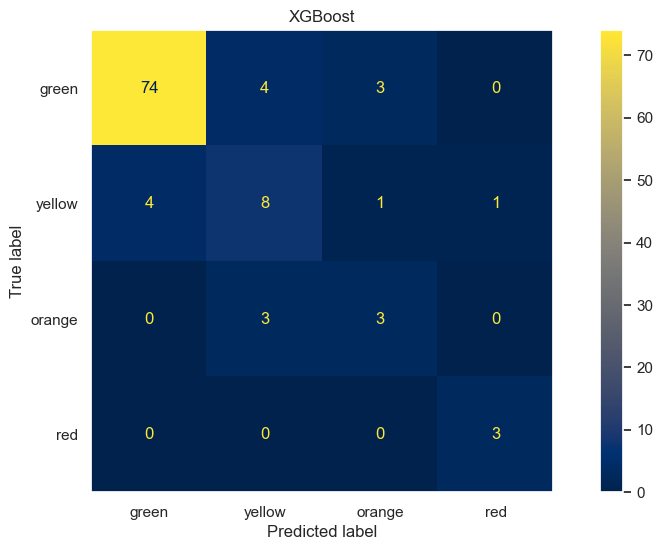

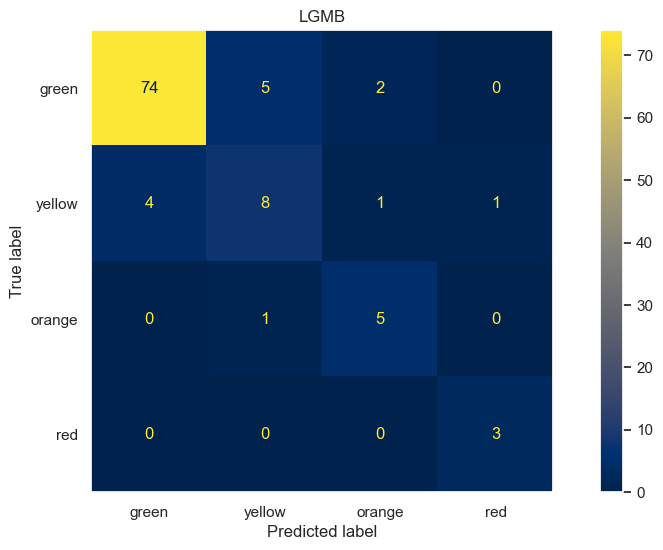

In [ ]:
sns.set_style("dark")

models = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "LGMB"]

pred = {
  "Decision Tree" : y_pred_dtc, 
  "Random Forest" : y_pred_rfc, 
  "Gradient Boosting" : y_pred_gbc, 
  "XGBoost" : y_pred_xgb, 
  "LGMB" : y_pred_lgbm
}

print(y_test.value_counts())

for model in models:
  cm = confusion_matrix(y_test, pred[model])
  cmd = ConfusionMatrixDisplay(cm, display_labels=["green", "yellow", "orange", "red"])
  cmd.plot(cmap="cividis")
  cmd.ax_.set_title(model)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=.95)

preprocessor = make_column_transformer(category_tuple, number_tuple, remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed = pca.fit_transform(X_train_processed)
X_test_processed = pca.transform(X_test_processed)

#### 1) PCA con Decision Tree Classifier:

In [ ]:
# Optimización Hyper-parámetros Decision Tree Classifier:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_processed, y_train)

param_grid = {
  'max_depth': [2, 3, 4, 5, 6],
  'min_samples_split': [2, 4],
  'min_samples_leaf': [7, 8, 9],
  'max_features': ['sqrt', 'log2', None]
}

gs_dtc = GridSearchCV(dtc, param_grid, cv=5, scoring="f1_weighted")
gs_dtc.fit(X_train_processed, y_train)

dtc = DecisionTreeClassifier(random_state=42, **gs_dtc.best_params_)
dtc.fit(X_train_processed, y_train)
y_pred_dtc = dtc.predict(X_test_processed)

print("Best parameters DecisionTreeClassifier: ", gs_dtc.best_params_)
print("Best score DecisionTreeClassifier: \t{:.3f}".format(gs_dtc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_dtc, average='weighted'), 3))

Best parameters DecisionTreeClassifier:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best score DecisionTreeClassifier: 	0.803
F1 score on test data:			 0.786


#### 2) PCA con Random Forest Classifier:

In [ ]:
# Optimización Hyper-parámetros Random Forest Classifier:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_processed, y_train)

param_grid = {
  'n_estimators': [300, 320, 340],
  'max_depth': [11, 13, 15],
  'min_samples_split': [2, 5 ],
  'min_samples_leaf': [1, 2 ]
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=5, scoring='f1_weighted')
gs_rfc.fit(X_train_processed, y_train)

rfc = RandomForestClassifier(random_state=42, **gs_rfc.best_params_)
rfc.fit(X_train_processed, y_train)
y_pred_rfc = rfc.predict(X_test_processed)


print("Best parameters RandomForestClassifier: ", gs_rfc.best_params_)
print("Best score RandomForestClassifier: \t{:.3f}".format(gs_rfc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_rfc, average='weighted'), 3))

Best parameters RandomForestClassifier:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 320}
Best score RandomForestClassifier: 	0.728
F1 score on test data:			 0.78


#### 3) PCA con Gradient Boosting Classifier:

In [ ]:
# Optimización Hyper-parámetros gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [75, 80, 85],
    'max_depth': [2, 3, 4]
}

gs_gbc = GridSearchCV(gbc, param_grid, cv=5, scoring='f1_weighted')
gs_gbc.fit(X_train_processed, y_train)

gbc = GradientBoostingClassifier(random_state=42, **gs_gbc.best_params_)
gbc.fit(X_train_processed, y_train)
y_pred_gbc = gbc.predict(X_test_processed)

print("Best parameters GradientBoostingClassifier: ", gs_gbc.best_params_)
print("Best score GradientBoostingClassifier: \t{:.3f}".format(gs_gbc.best_score_))
print("F1 score on test data:\t\t\t", round(f1_score(y_test, y_pred_gbc, average='weighted'), 3))

Best parameters GradientBoostingClassifier:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 80}
Best score GradientBoostingClassifier: 	0.794
F1 score on test data:			 0.867


#### 4) PCA con XGB Classifier:

In [ ]:
# Optimización Hyper-parámetros XGB boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

param_grid = {
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [8, 9, 10],
  'n_estimators': [55, 60, 65],
  'gamma': [0.1]
}

gs_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_weighted')
gs_xgb.fit(X_train_processed, y_train)

xgb = XGBClassifier(**gs_xgb.best_params_)
xgb.fit(X_train_processed, y_train)
y_pred_xgb = xgb.predict(X_test_processed)

print("Best parameters XGBClassifier: ", gs_xgb.best_params_)
print("Best score XGBClassifier: \t{:.3f}".format(gs_xgb.best_score_))
print("F1 score on test data:\t\t", round(f1_score(y_test, y_pred_xgb, average='weighted'), 3))

Best parameters XGBClassifier:  {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 55}
Best score XGBClassifier: 	0.801
F1 score on test data:		 0.858


#### 5) PCA con LGBM Classifier:

In [ ]:
# Optimización Hyper-parámetros LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_processed, y_train)

param_grid = {
  'num_leaves': [25, 30, 35],
  'learning_rate': [0.1, 0.01],
  'n_estimators': [80, 100, 120],
  'min_child_samples': [10, 20],
  'subsample': [0.8, 1],
  'colsample_bytree': [0.8, 1]
}

gs_lgbm = GridSearchCV(lgbm, param_grid, cv=5, scoring='f1_weighted')
gs_lgbm.fit(X_train_processed, y_train)

lgbm = LGBMClassifier(**gs_lgbm.best_params_)
lgbm.fit(X_train_processed, y_train)
y_pred_lgbm = lgbm.predict(X_test_processed)

print("Best parameters LGBMClassifier: ", gs_lgbm.best_params_)
print("Best score LGBMClassifier: \t{:.3f}".format(gs_lgbm.best_score_))
print("F1 score on test data:\t\t", round(f1_score(y_test, y_pred_lgbm, average='weighted'), 3))

Best parameters LGBMClassifier:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 80, 'num_leaves': 25, 'subsample': 0.8}
Best score LGBMClassifier: 	0.797
F1 score on test data:		 0.886


**Matrices de Confusión**

0    81
1    14
2     6
3     3
Name: alert, dtype: int64


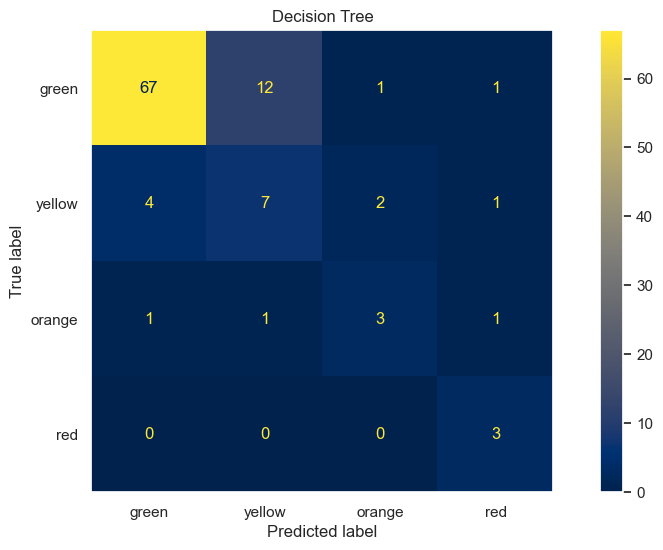

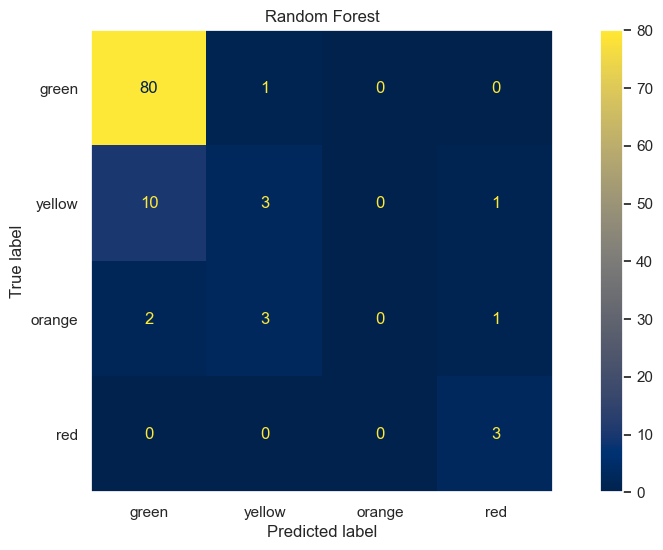

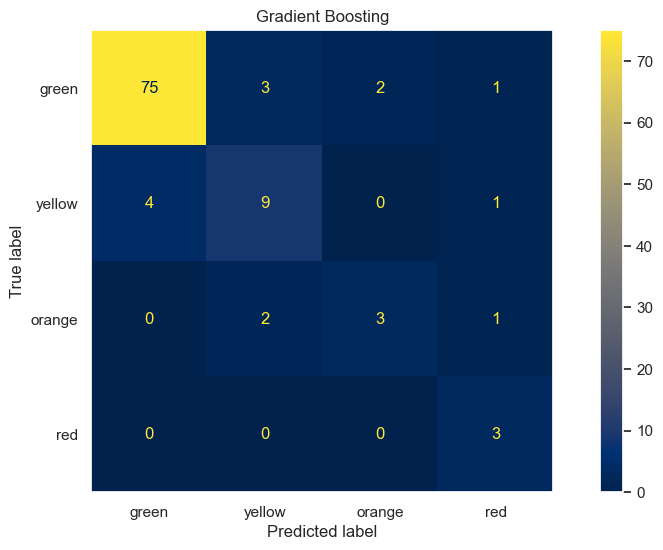

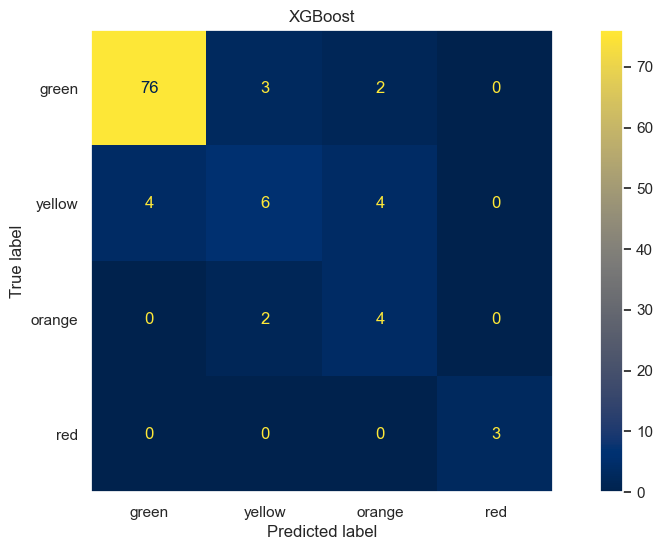

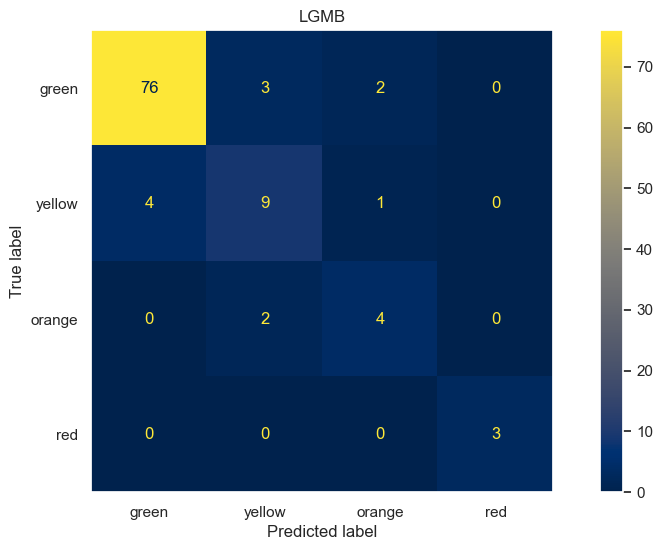

In [ ]:
pred = {
  "Decision Tree" : y_pred_dtc, 
  "Random Forest" : y_pred_rfc, 
  "Gradient Boosting" : y_pred_gbc, 
  "XGBoost" : y_pred_xgb, 
  "LGMB" : y_pred_lgbm
}

print(y_test.value_counts())

for model in models:
  cm = confusion_matrix(y_test, pred[model])
  cmd = ConfusionMatrixDisplay(cm, display_labels=["green", "yellow", "orange", "red"])
  cmd.plot(cmap="cividis")
  cmd.ax_.set_title(model)

### **CONCLUSIÓN:**

El clasificador LGMB con PCA es el que mejor desempeño tiene con los datos de prueba llegando casi a un 90% de precisión F1. El mismo modelo sin PCA también es el mejor puntuado. 

Para ambos casos, PCA o sin PCA, su matriz de confusión es también la que menor errores en predicción tiene.

**El modelo de producción será el Clasificador LGMB con PCA**

<hr>

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import np_utils, set_random_seed
seed = 314

In [ ]:
X_train_processed.shape[1]

23

In [ ]:
y_train_cat = np_utils.to_categorical(y_train, num_classes=4)
y_test_cat = np_utils.to_categorical(y_test, num_classes=4)

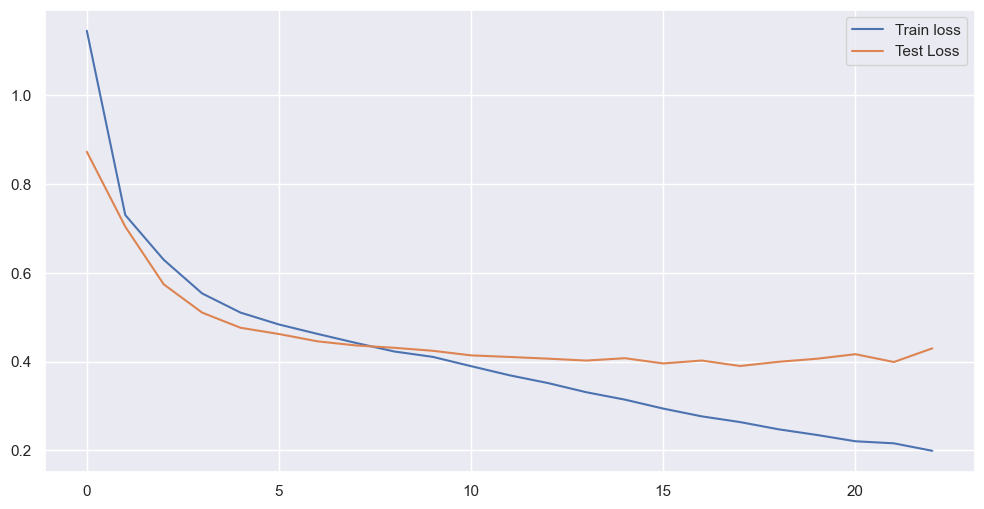

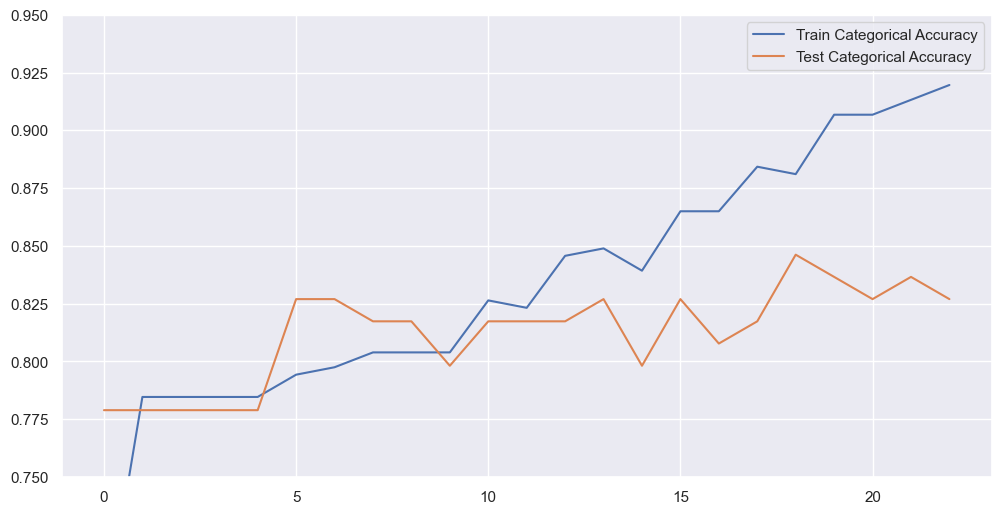

4/4 [==============================] - 0s 2ms/step
0    81
1    14
2     6
3     3
Name: alert, dtype: int64


Text(0.5, 1.0, 'Neural Network')

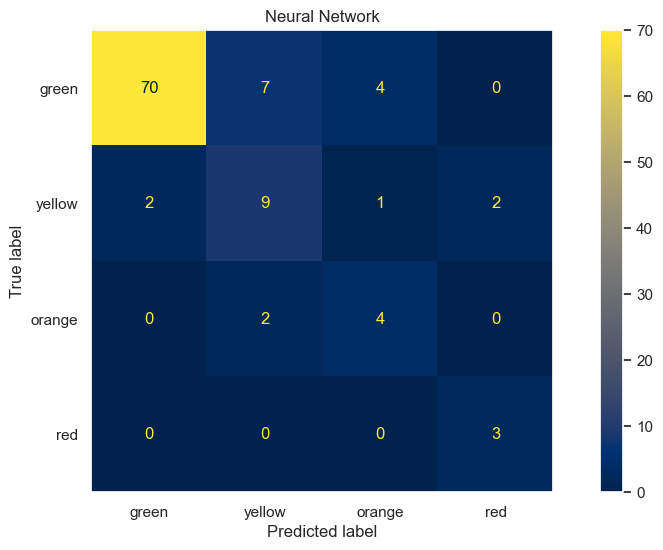

In [ ]:
set_random_seed(seed)

model = Sequential()
model.add(Dense(8, input_dim = X_train_processed.shape[1], activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',  metrics=['categorical_accuracy'])
early_stopping = EarlyStopping(patience = 5)

history = model.fit(X_train_processed, y_train_cat, validation_data=(X_test_processed, y_test_cat), epochs=200, callbacks = [early_stopping], verbose=False)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.grid()
plt.legend()
plt.show()

# Visualize the accuracy
plt.plot(history.history['categorical_accuracy'], label='Train Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Test Categorical Accuracy') 
plt.ylim(0.75, 0.95) 
plt.grid()
plt.legend()
plt.show()

y_pred_neural = model.predict(X_test_processed)

print (y_test.value_counts())
cm = confusion_matrix(y_test, np.argmax(y_pred_neural, axis=1))
cmd = ConfusionMatrixDisplay(cm, display_labels=["green", "yellow", "orange", "red"])
cmd.plot(cmap="cividis")
cmd.ax_.set_title("Neural Network")

In [ ]:
df_solution  = df[df["alert"].isna()]
df_solution.drop(columns="alert")
X_sol = preprocessor.transform(df_solution.drop(columns=["alert", "title", "date_time", "tsunami", "net", "magType", "location", "country"]))
X_sol = pca.transform(X_sol)
y_sol = lgbm.predict(X_sol)
y_sol.shape

(367,)

In [ ]:
predicted_filter = df["alert"].isna()
df_final = df.copy(deep=True)
df_final[predicted_filter]

# dfp["alert"] = dfp["alert"].replace({"green":0, "yellow":1, "orange": 2, "red":3})

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,week_day,month
32,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,2022-11-01 12:39:00,0,3,NaN,1,650,at,97,1.616070,108.0,Mi,37.0,52.5020,-168.080,"Nikolski, Alaska",North Pacific,natural/water,Tuesday,November
33,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,2022-11-01 12:39:00,0,3,NaN,1,650,pt,23,0.000000,208.8,Mi,37.0,52.5020,-168.080,"Nikolski, Alaska",North Pacific,natural/water,Tuesday,November
35,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,2022-11-01 11:35:00,0,4,NaN,1,691,at,50,0.936943,126.0,Mi,33.0,52.4800,-167.736,"Nikolski, Alaska",North Pacific,natural/water,Tuesday,November
36,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,2022-11-01 11:35:00,0,4,NaN,1,691,pt,20,0.000000,205.2,Mi,33.0,52.4800,-167.736,"Nikolski, Alaska",North Pacific,natural/water,Tuesday,November
117,"M 6.6 - 34km NNE of Ndoi Island, Fiji",6.6,2019-01-09 15:54:00,2,3,NaN,1,671,us,0,4.121000,19.0,mww,591.0,-20.3641,-178.570,"Ndoi Island, Fiji",Oceania,Fiji,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,2001-01-13 17:33:00,0,8,NaN,0,912,us,427,0.000000,0.0,mwc,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",North America,El Salvador,Saturday,January
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,2001-10-01 16:02:00,5,7,NaN,0,745,ak,0,0.000000,0.0,mw,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,United States of America,Monday,October
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,2001-09-01 16:49:00,0,7,NaN,0,776,us,372,0.000000,0.0,mwb,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Oceania,Vanuatu,Saturday,September
780,"M 6.8 - Mindanao, Philippines",6.8,2001-01-01 08:54:00,0,5,NaN,0,711,us,64,0.000000,0.0,mwc,33.0,6.6310,126.899,"Mindanao, Philippines",Sea/Ocean,natural/water,Monday,January


In [ ]:
df_final.loc[predicted_filter,"alert"] = y_sol

In [ ]:
df_final["alert"].replace({0:"green", 1:"yellow", 2:"orange", 3:"red"}, inplace=True)
df_final["alert"].value_counts()

green     661
yellow     81
orange     26
red        14
Name: alert, dtype: int64

In [ ]:
df["alert"].value_counts()

green     325
yellow     56
orange     22
red        12
Name: alert, dtype: int64

In [ ]:
sns.set()
sns.set_style("ticks", {'axes.grid' : True, 'figure.facecolor': 'whitesmoke', 'grid.color': '.85'})

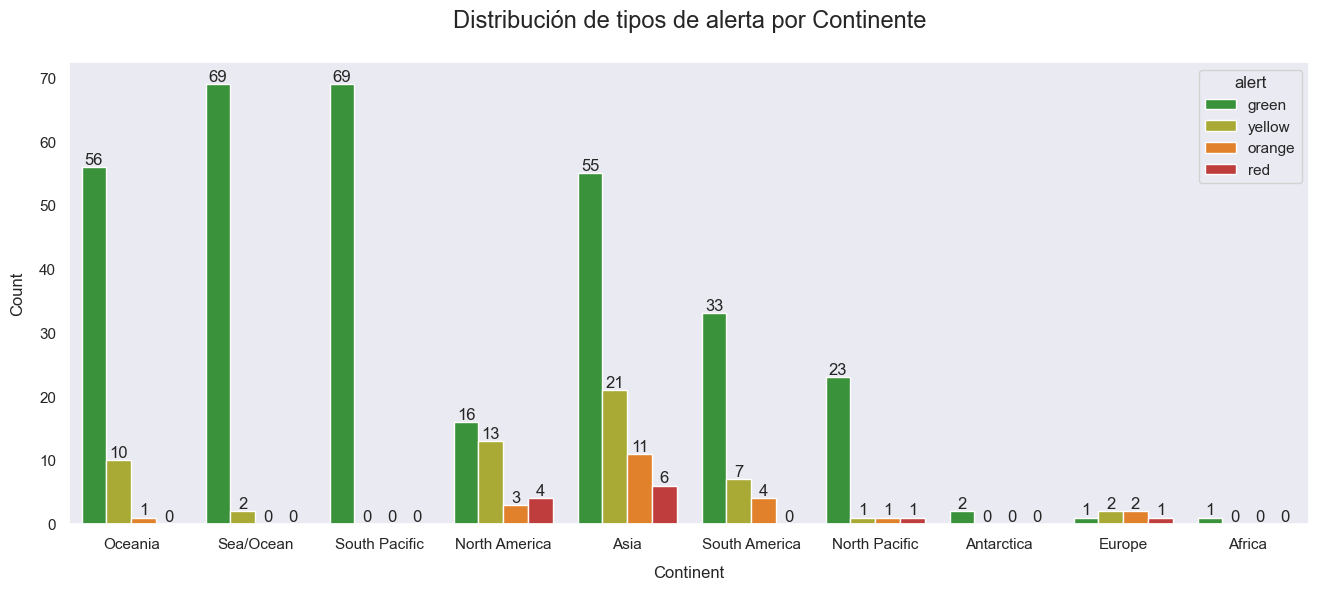

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df, x="continent", hue="alert", palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red"})
for label in axes.containers:
  axes.bar_label(label)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Continent', labelpad=10)
plt.title("Distribución de tipos de alerta por Continente", {"fontsize":17}, pad=25)
plt.show()

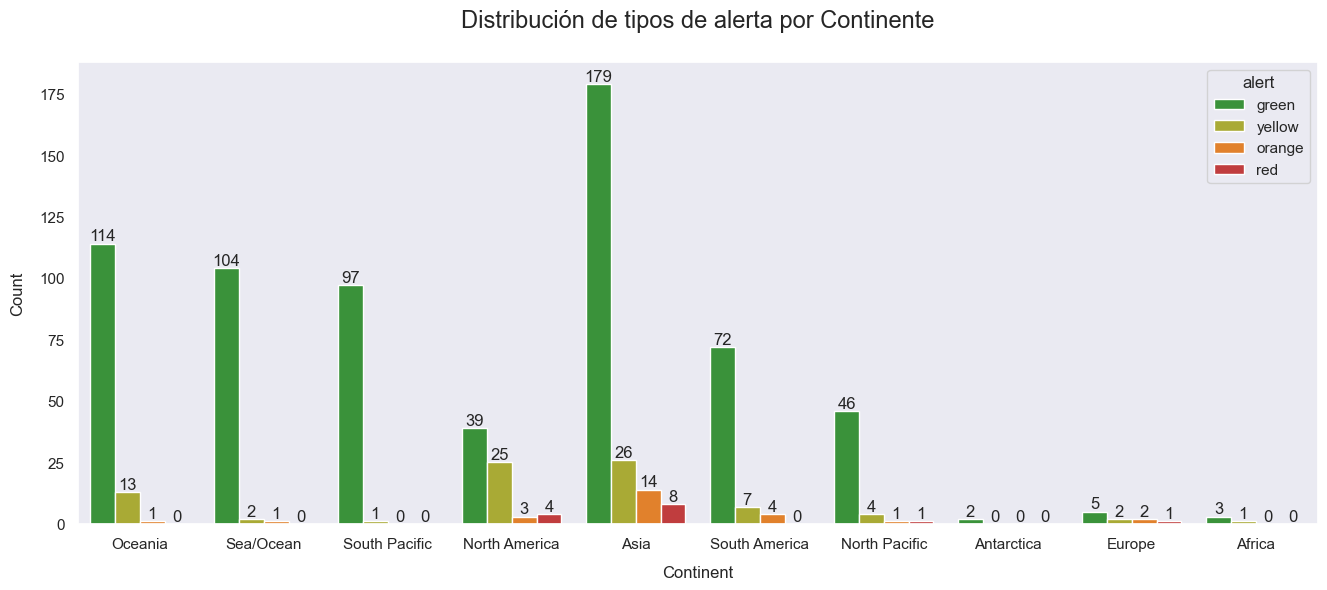

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))
axes = sns.countplot(data=df_final, x="continent", hue="alert", palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red"})
for label in axes.containers:
  axes.bar_label(label)
plt.ylabel('Count', labelpad=10)
plt.xlabel('Continent', labelpad=10)
plt.title("Distribución de tipos de alerta por Continente", {"fontsize":17}, pad=25)
plt.show()

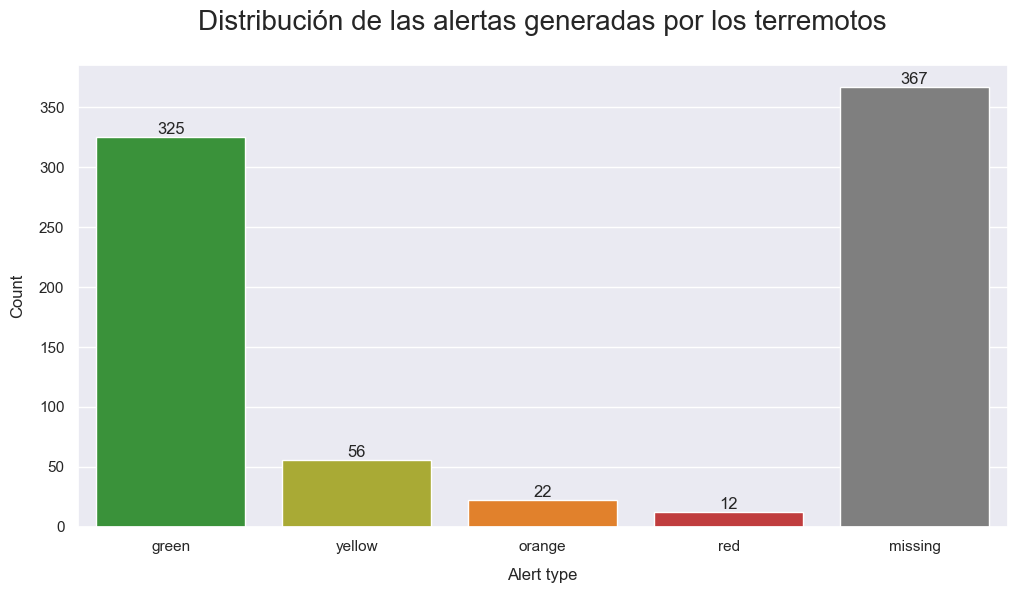

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)}, font_scale=1)
ax = sns.countplot(data=df.fillna(value="missing"), x='alert', order=['green', 'yellow', 'orange', 'red', 'missing'], palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red", "missing":"tab:gray"})
ax.bar_label(ax.containers[0])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Alert type', labelpad=10)
plt.title("Distribución de las alertas generadas por los terremotos", {"fontsize":20}, pad=25);
plt.show()

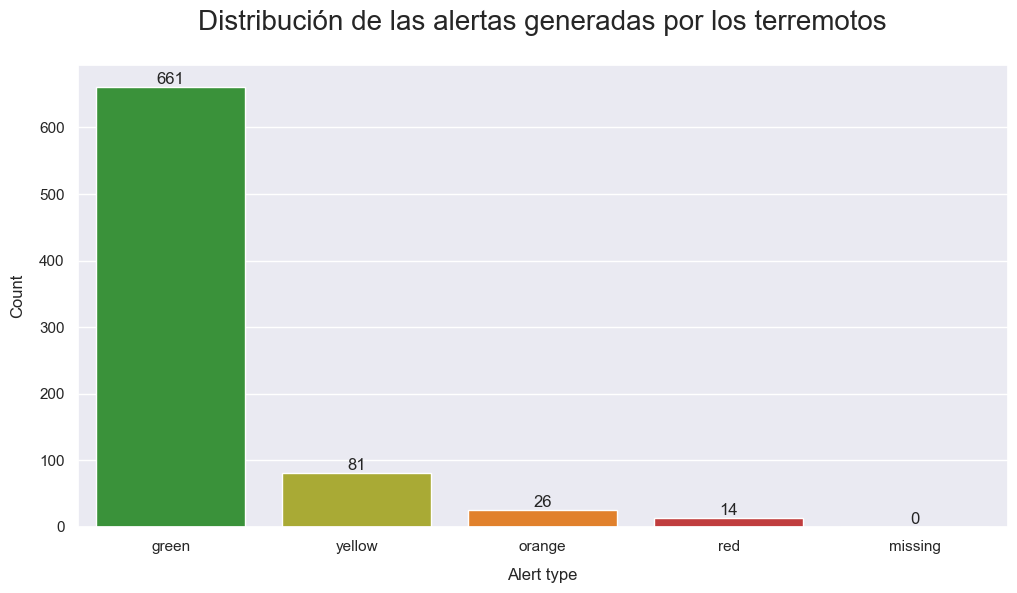

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)}, font_scale=1)
ax = sns.countplot(data=df_final.fillna(value="missing"), x='alert', order=['green', 'yellow', 'orange', 'red', 'missing'], palette={"green":"tab:green", "yellow":"tab:olive", "orange":"tab:orange", "red":"tab:red", "missing":"tab:gray"})
ax.bar_label(ax.containers[0])
plt.ylabel('Count', labelpad=10)
plt.xlabel('Alert type', labelpad=10)
plt.title("Distribución de las alertas generadas por los terremotos", {"fontsize":20}, pad=25);
plt.show()

In [ ]:
df_map = df[df["magnitude"] >= 8][["alert", "magnitude", "latitude", "longitude"]]
df_map["alert"].replace({"green":"lightgreen", "yellow":"darkgreen", np.nan:"black"}, inplace=True)

fig = Figure(width=1200, height=600)
map = folium.Map(location = [df[df["magnitude"] >= 8]["latitude"].mean(), df[df["magnitude"] >= 8]["longitude"].mean()], zoom_start=2, scrollWheelZoom=False, dragging=True)
for index in df_map.index:
  folium.Marker(location=[df_map.loc[index,"latitude"], df_map.loc[index,"longitude"]],popup=df_map.loc[index,"magnitude"], icon=folium.Icon(color=df_map.loc[index,"alert"], icon="times", prefix='fas fa') ).add_to(map)
fig.add_child(map)

In [ ]:
limit = 6
df_map = df_final[df_final["magnitude"] >= limit][["alert", "magnitude", "latitude", "longitude"]]
df_map["alert"].replace({"green":"lightgreen", "yellow":"darkgreen", np.nan:"black"}, inplace=True)

fig = Figure(width=1200, height=600)
map = folium.Map(location = [df_final[df_final["magnitude"] >= 8]["latitude"].mean(), df_final[df_final["magnitude"] >= 8]["longitude"].mean()], zoom_start=3, scrollWheelZoom=False, dragging=True)
for index in df_map.index:
  folium.Marker(location=[df_map.loc[index,"latitude"], df_map.loc[index,"longitude"]],popup=df_map.loc[index,"magnitude"], icon=folium.Icon(color=df_map.loc[index,"alert"], icon="times", prefix='fas fa') ).add_to(map)
fig.add_child(map)

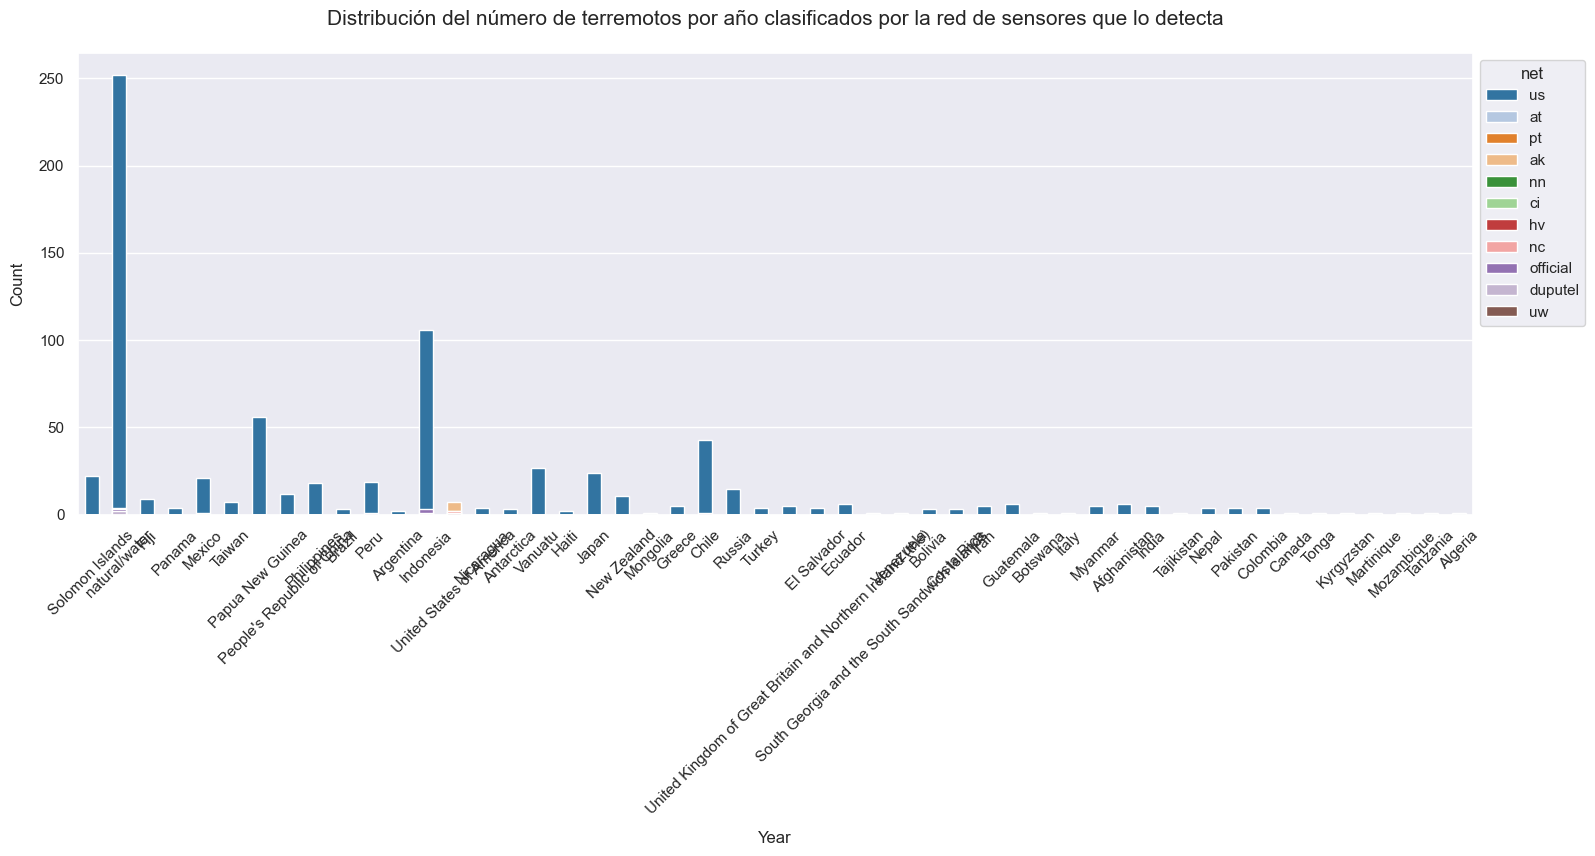

In [ ]:
plt.figure(figsize=(18,6))
ax =sns.countplot(data=df_final, x=df_final["country"], dodge=False, width=.5, palette=sns.color_palette(palette="tab20"), hue="net")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Count', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.xticks(rotation=45)
plt.title("Distribución del número de terremotos por año clasificados por la red de sensores que lo detecta", {"fontsize":15}, pad=20)
plt.show()

In [ ]:
df_final["country"].value_counts()[:10].plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Número de terremotos por año clasificados por pais", {"fontsize":15}, pad=20)

NameError: name 'df_final' is not defined